In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df_excercise = pd.read_csv('exercise.csv')
df_calories = pd.read_csv('calories.csv')

In [22]:
df_excercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [23]:
df_calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [24]:
df = pd.merge(df_excercise, df_calories, on='User_ID', how='inner')

In [25]:
df.rename(mapper=lambda x: x.lower(), axis=1, inplace=True)

In [27]:
df.drop(columns=['user_id'], inplace=True)

In [28]:
column = 'heart_rate'
Q1 =  df[column].quantile(0.05)
Q3 = df[column].quantile(0.95)
df = df[(df[column] > Q1 ) & (df[column] < Q3)]
df

,gender,age,height,weight,duration,heart_rate,body_temp,calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [29]:
df['gender'] = df.loc[:, 'gender'].map(lambda x: x.strip()=='male')
df.rename(columns={'gender':'is_male'}, inplace=True)
df

/var/folders/6b/_mywqpwn1n162bktqnwy_k700000gn/T/ipykernel_11100/857551938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df.loc[:, 'gender'].map(lambda x: x.strip()=='male')
/var/folders/6b/_mywqpwn1n162bktqnwy_k700000gn/T/ipykernel_11100/857551938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'gender':'is_male'}, inplace=True)


,is_male,age,height,weight,duration,heart_rate,body_temp,calories
0,True,68,190.0,94.0,29.0,105.0,40.8,231.0
1,False,20,166.0,60.0,14.0,94.0,40.3,66.0
2,True,69,179.0,79.0,5.0,88.0,38.7,26.0
3,False,34,179.0,71.0,13.0,100.0,40.5,71.0
4,False,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,False,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,False,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,False,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,True,78,193.0,97.0,2.0,84.0,38.3,11.0


In [30]:
x = df.drop(columns=['calories'])
y = df['calories']

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [33]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print(f'R2: {r2_score(y_pred, y_test)}')
print(f'MSE: {mean_squared_error(y_pred, y_test)}')
print(f'MAE: {mean_absolute_error(y_pred, y_test)}')

R2: 0.9710047193925305
MSE: 88.27114252146451
MAE: 7.020203621106768


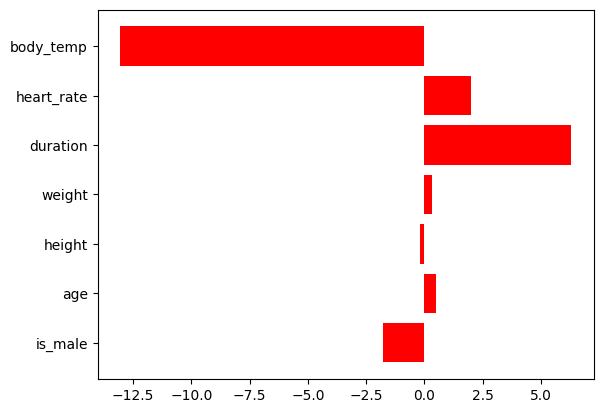

In [34]:
plt.barh(x.columns, model.coef_, color='red')
plt.show()

In [39]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(f'R2: {r2_score(y_pred, y_test)}')
print(f'MSE: {mean_squared_error(y_pred, y_test)}')
print(f'MAE: {mean_absolute_error(y_pred, y_test)}')

R2: 0.9710047193925305
MSE: 88.27114252146451
MAE: 7.020203621106768


In [43]:
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, 1, 2, 4],
    'positive': [True, False],
}

In [44]:
import warnings

warnings.filterwarnings("ignore")

In [45]:
from sklearn.model_selection import GridSearchCV

grid_model = GridSearchCV(LinearRegression(), param_grid = param_grid, scoring='neg_mean_squared_error')
grid_model.fit(x_train, y_train)

g_y_pred = model.predict(x_test)

print(f'R2: {r2_score(g_y_pred, y_test)}')
print(f'MSE: {mean_squared_error(g_y_pred, y_test)}')
print(f'MAE: {mean_absolute_error(g_y_pred, y_test)}')

R2: 0.9710047193925305
MSE: 88.27114252146451
MAE: 7.020203621106768


In [46]:
grid_model.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [47]:
import pickle

with open('linear_calories.pickle', 'wb') as file:
    pickle.dump(grid_model, file)